In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from math import log
import string
import seaborn as sns
import matplotlib.pylab as plt
import pickle
import heapq
from IPython.display import clear_output
stopwords = pd.read_pickle('/Users/chinmayshrivastava/Desktop/OSCA/V4.0/stopwords.pickle')

In [2]:
database = pd.read_pickle('/Users/chinmayshrivastava/Desktop/OSCA/V4.0/scraping/databasefromhnandbc101.pickle')
headings = pd.read_pickle('/Users/chinmayshrivastava/Desktop/OSCA/V4.0/scraping/headingsfromhnandbc101.pickle')
paragraphs = pd.read_pickle('/Users/chinmayshrivastava/Desktop/OSCA/V4.0/scraping/paragraphsfromhnandbc101.pickle')

In [8]:
headings.iloc[5000]

tag                                      h4
headingtext               3d. Truffle suite
subheading                             None
nextheading                            None
paragraphs     [23681, 23682, 23683, 23684]
Name: 5000, dtype: object

In [61]:
ngramrange = (3, 3)

headingsvectorizer = CountVectorizer(analyzer='word', ngram_range=ngramrange)
docs = list(headings.iloc[5000:10000]['headingtext'])
X1 = headingsvectorizer.fit_transform(docs)
countmatrixH = X1.toarray()
vocabularyH = headingsvectorizer.vocabulary_
summ = sum(countmatrixH, 0)

In [62]:
index = []
top150 = []
for a in list(heapq.nlargest(15000, summ)):
    index.append(list(summ).index(a))
for key in vocabularyH:
    if vocabularyH[key] in index:
        top150.append(key)

In [63]:
filter_ = []
for ele in top150:
    temp = ele.split(' ')
    if temp[0] in stopwords:
        continue
    filter_.append(ele)

In [3]:
index = 0
kws = set()

In [5]:
for heading in headings['headingtext']:
    clear_output(wait=True)
    print(heading, index)
#     while True:
    i = input('enter kw:')
    if i == '':
        break
    kws.add(i)
    index+=1

Is Blockchain-Based Watch-to-Earn Monetization the Future of Video Streaming? 0


KeyboardInterrupt: Interrupted by user

In [ ]:
a = ['proof of work','proof of stake','smart contract','blockchain technology','metaverse','blockchain',
    'cryptography','defi','block','dao','bitcoin','cryptocurrency','crypto','nft','ethereum']

In [12]:
# kwid = {'blockchain':0, 
#        'cryptocurrency':1, 
#        'smart contracts':2, 
#        'bitcoin':3, 
#        'ethereum':4, 
#        'zero knowledge proofs':5, 
#        'ether':6, 
#        'solana':7, 
#        'decentralised applications':8, 
#        'decentralised autonomous organisations':9}

# kws = {'blockchain':None, 
#        'cryptocurrency':None, 
#        'smart contracts':None, 
#        'bitcoin':None, 
#        'ethereum':None, 
#        'zero knowledge proofs':['zkp', 'zkps'], 
#        'ether':None, 
#        'solana':None, 
#        'decentralised applications':['dapp', 'dapps'], 
#        'decentralised autonomous organisations':['dao', 'daos']}

kwid = {'blockchain':0, 
       'web3':1,
       'ethereum':2,
       'nft':3,
       'metaverse':4,
       'crypto':5,
       'bitcoin':6,
       'dao':7,
       'defi':8,
       'consensus':9}

kws = {'blockchain':None, 
       'web3':None,
       'ethereum':None,
       'nft':None,
       'metaverse':None,
       'crypto':None,
       'bitcoin':None,
       'dao':None,
       'defi':None,
       'consensus':None}

In [13]:
connectionmatrix = np.zeros((len(kws), len(kws)))

In [14]:
connectionmatrix.shape

(10, 10)

In [21]:
# for headingid in headings.index:
#     if countmatrixH[headingid, vocabularyH['cryptocurrency']]!=0:
#         for pgid in headings.iloc[headingid]['paragraphs']:
#             if countmatrixP[pgid, vocabularyP['cryptocurrency']]!=0:
#                 connectionmatrix[1, 1]+=1
range_ = [(0, 25000), (25000, 50000),
          (50000, 75000), (75000, 100000),
          (100000, 125000), (125000, 150000), 
          (150000, 175000), (175000, 200000), 
          (200000, 225000), (225000, 250000), 
          (250000, 275000), (275000, 300000), 
          (300000, len(paragraphs.index))]
headingid = 0

for element in range_:
    print(element)
    paragraphsvectorizer = CountVectorizer(analyzer='word', ngram_range=ngramrange)
    docs = list(paragraphs.iloc[element[0]:element[1]]['text'])
    X2 = paragraphsvectorizer.fit_transform(docs)
    countmatrixP = X2.toarray()
    vocabularyP = paragraphsvectorizer.vocabulary_
    try:
        while headingid<len(headings.index):
            headingid+=1
            for kw1 in kws:
                try:
                    if countmatrixH[headingid, vocabularyH[kw1]]!=0:
                        for kw2 in kws:
                            if kw1==kw2:
                                continue
                            for pgid in headings.iloc[headingid]['paragraphs']:
                                pgid = pgid-element[0]
                                try:
                                    if countmatrixP[pgid, vocabularyP[kw2]]!=0:
                                        connectionmatrix[kwid[kw1], kwid[kw2]]+=countmatrixP[pgid, 
                                                                                             vocabularyP[kw2]]/sum(countmatrixP[pgid, :])
                                except KeyError:
                                    continue
                except KeyError:
                    continue

    except IndexError:
        headingid = headingid-1
        continue

(0, 25000)
(25000, 50000)
(50000, 75000)
(75000, 100000)
(100000, 125000)
(125000, 150000)
(150000, 175000)
(175000, 200000)
(200000, 225000)
(225000, 250000)
(250000, 275000)
(275000, 300000)
(300000, 308890)


In [22]:
# connectionmatrix
# array([[15287.,   700.],
#        [  350.,   662.]])
connectionmatrix

array([[ 0.        ,  3.89424272, 12.08882928,  7.20367663,  4.41467702,
        14.3961545 , 14.87385403,  0.82276911,  7.83723031,  2.3800332 ],
       [ 9.24035549,  0.        ,  3.30645337,  1.45502172,  1.48903943,
         1.04854376,  0.24823575,  0.67039388,  1.53783658,  0.07894737],
       [ 4.47995965,  0.13339921,  0.        ,  0.91322714,  0.        ,
         1.0087133 ,  0.91860787,  0.        ,  1.07752634,  0.57840589],
       [ 6.49332072,  0.47135985,  2.02140576,  0.        ,  3.28087648,
         2.59402224,  0.184375  ,  0.44975363,  0.25037444,  0.        ],
       [ 4.56954816,  1.06780795,  0.24762529,  4.06689194,  0.        ,
         3.86376582,  0.23992674,  0.85695774,  0.58764006,  0.        ],
       [ 6.10148198,  1.41179   ,  2.40292723,  1.68243571,  3.22171758,
         0.        ,  3.72521619,  0.08542413,  3.57739332,  0.42775216],
       [16.54160033,  0.20831601,  2.02411411,  0.04918033,  0.        ,
         6.26157205,  0.        ,  0.        

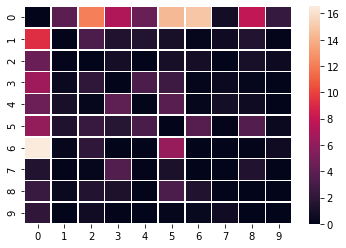

In [23]:
ax = sns.heatmap(connectionmatrix, linewidth=0.5)
plt.show()

In [21]:
countmatrixH[0, vocabularyH['blockchain']]

1

In [19]:
headings.iloc[0]['headingtext']

'Is Blockchain-Based Watch-to-Earn Monetization the Future of Video Streaming?'

In [30]:
connectionmatrix

array([[0., 2.],
       [0., 0.]])

In [54]:
sum(countmatrixP[:, vocabularyP['ethereum']])

3021

In [24]:
with open('matrix.pickle', 'wb') as file:
    pickle.dump(connectionmatrix, file)

In [14]:
pwd

'/Users/chinmayshrivastava/Desktop/OSCA/V4.0/Analysis of 30 Key Elements'